In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [5]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

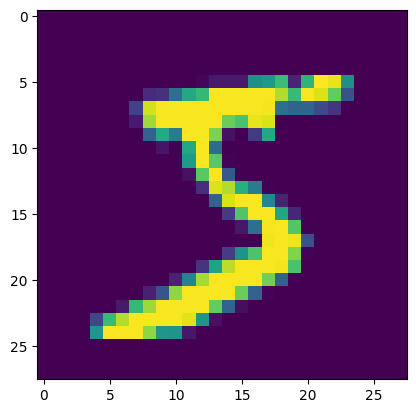

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [29]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [42]:
history = model.fit(X_train,y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9977 - loss: 0.0089 - val_accuracy: 0.9772 - val_loss: 0.1734
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9982 - loss: 0.0056 - val_accuracy: 0.9763 - val_loss: 0.1908
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9981 - loss: 0.0056 - val_accuracy: 0.9744 - val_loss: 0.2000
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9979 - loss: 0.0080 - val_accuracy: 0.9774 - val_loss: 0.1712
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9984 - loss: 0.0064 - val_accuracy: 0.9762 - val_loss: 0.1896
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9979 - loss: 0.0084 - val_accuracy: 0.9770 - val_loss: 0.1772
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9990 - loss: 0.0035 - val_accuracy: 0.9742 - val_loss: 0.2097
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9977 - loss: 0.0074 - 

In [43]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [44]:
y_prob

array([[2.3713330e-31, 1.0617539e-28, 2.2794272e-24, ..., 9.9999994e-01,
        5.9515331e-31, 1.3453968e-13],
       [0.0000000e+00, 9.5048943e-25, 9.9999994e-01, ..., 3.5450137e-28,
        8.7218786e-33, 0.0000000e+00],
       [1.7995783e-20, 9.9999994e-01, 8.4729115e-13, ..., 6.1117067e-10,
        5.9622030e-12, 7.1463152e-18],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.5988595e-32,
        1.6582965e-37, 1.6457063e-21],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.1801352e-25, 0.0000000e+00],
       [1.5011731e-36, 0.0000000e+00, 1.3100472e-34, ..., 0.0000000e+00,
        2.6762577e-25, 0.0000000e+00]], dtype=float32)

In [45]:
y_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [46]:
y_pred = y_prob.argmax(axis=1)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9791

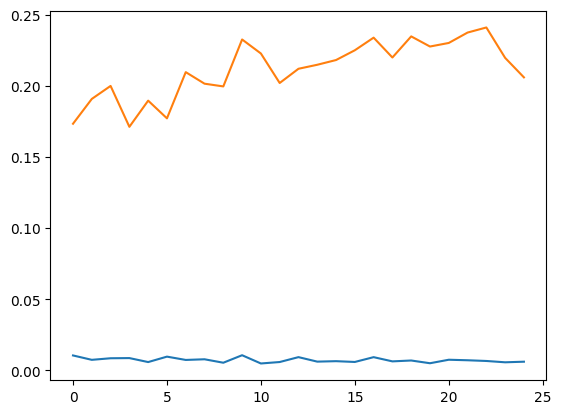

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


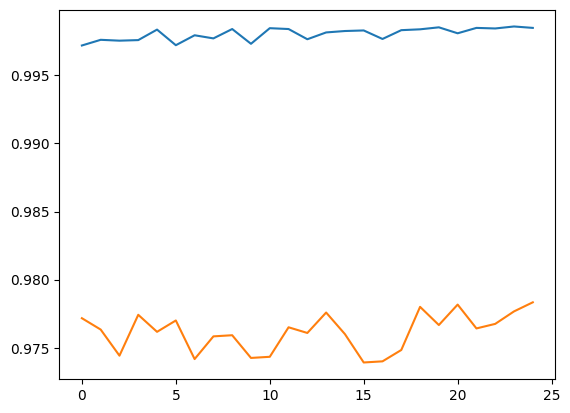

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

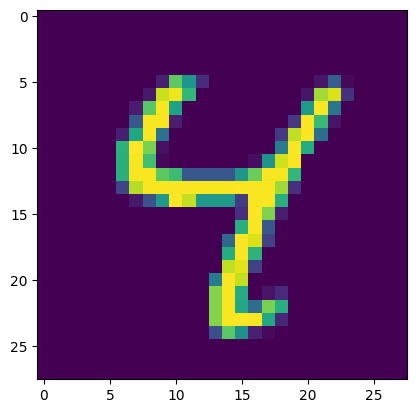

In [58]:
plt.imshow(X_test[6])

In [59]:
model.predict(X_test[6].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


array([4])